In [26]:
import pandas as pd

# Replace 'path_to_dataset' with the actual path to the downloaded dataset file
path_to_dataset = '/content/data_banknote_authentication.txt'

# Define column names for the dataset
# column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
# Read the dataset into a pandas DataFrame
df = pd.read_csv(path_to_dataset)

# Display the first few rows of the DataFrame
print(df.head())



    3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv('data_banknote_authentication.txt', names=column_names)

# Separate features and labels
X = df.drop('class', axis=1)
y = df['class']

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform train-test split
test_size = 0.3
random_state = 42  # For reproducibility

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=test_size, random_state=random_state)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (960, 4)
X_test shape: (412, 4)
y_train shape: (960,)
y_test shape: (412,)


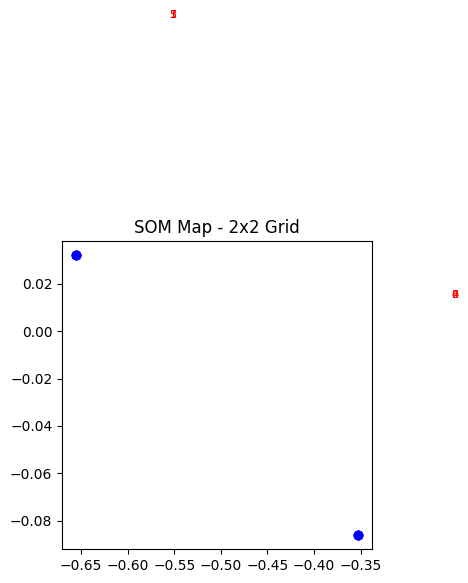

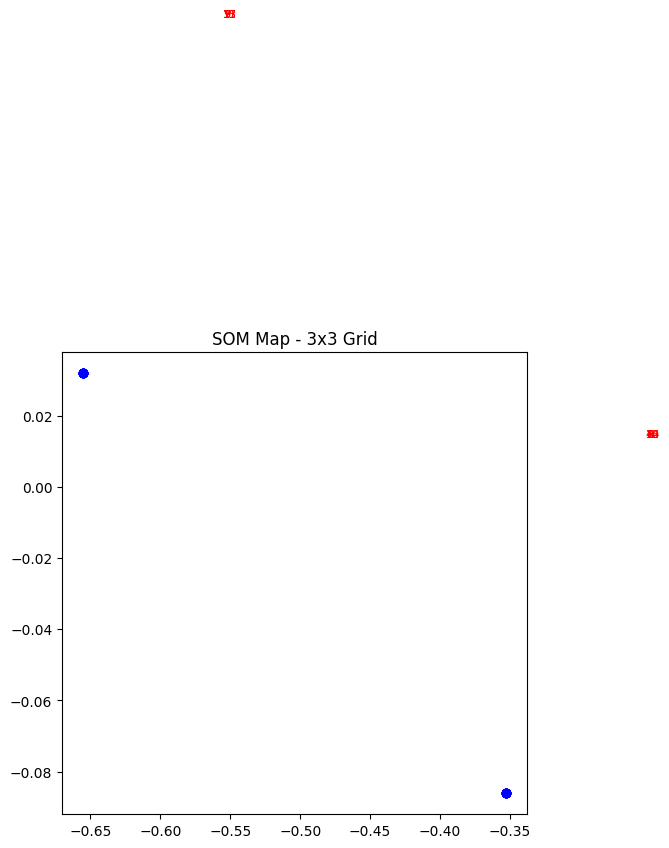

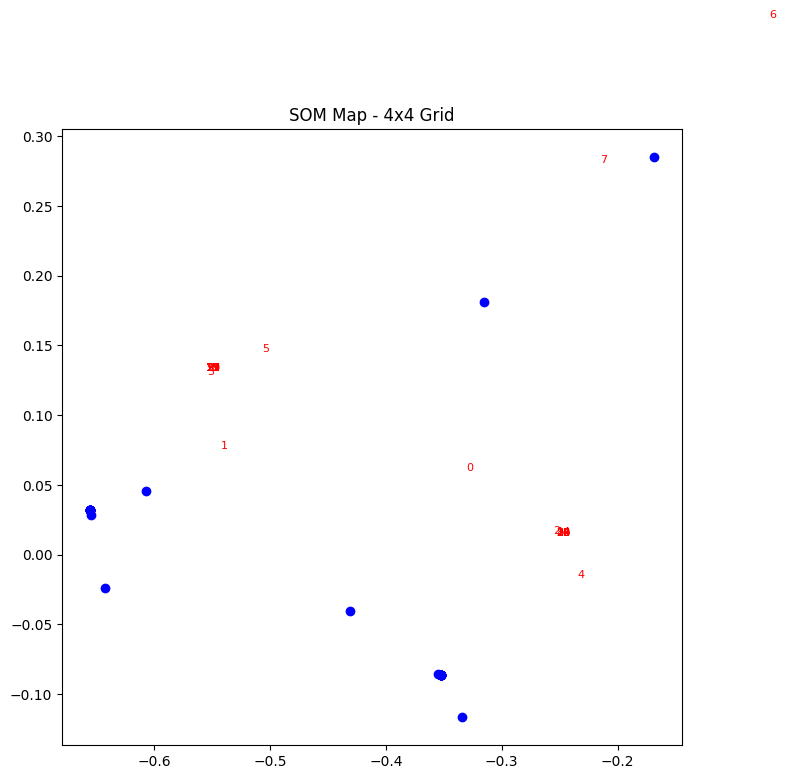

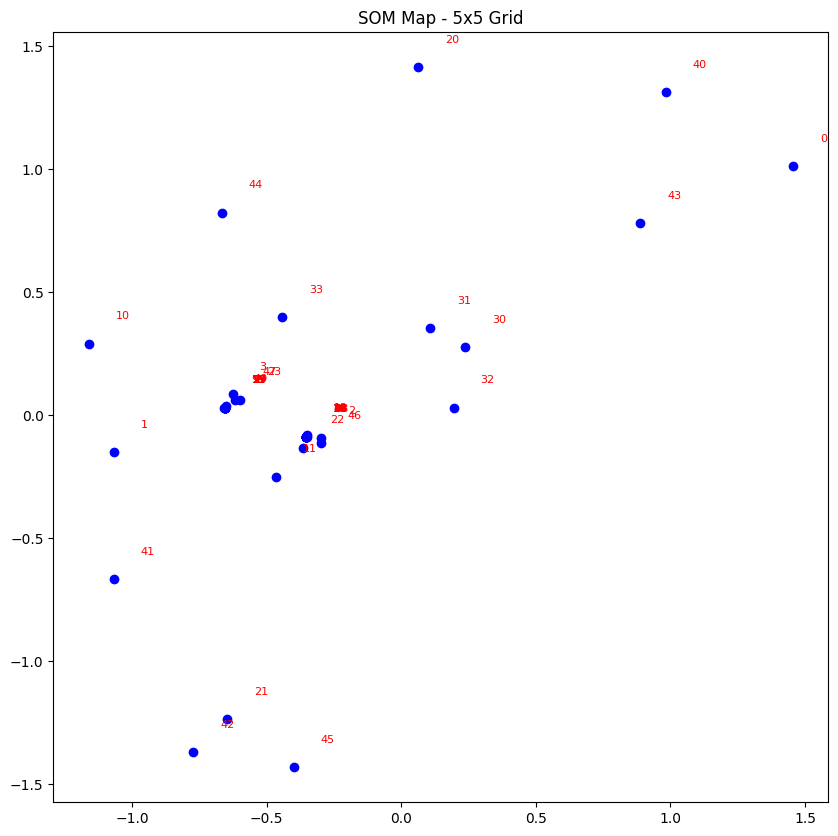

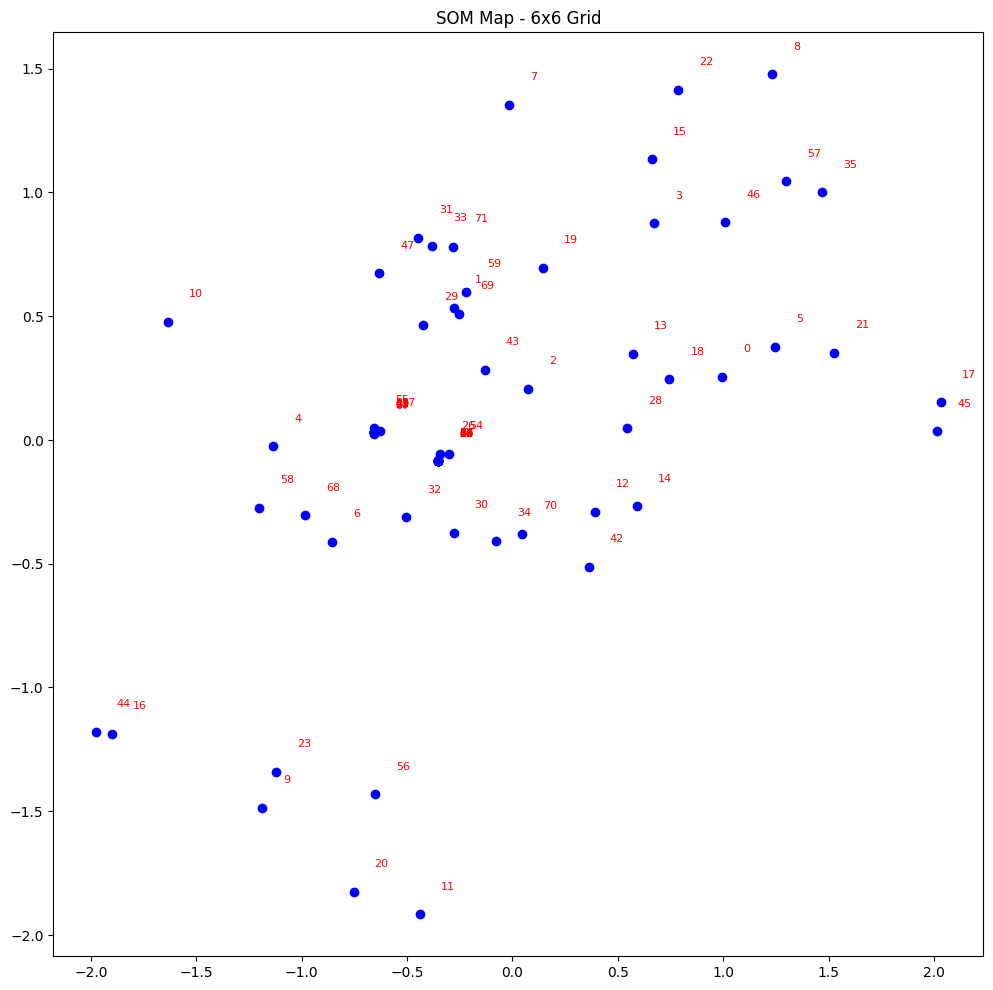

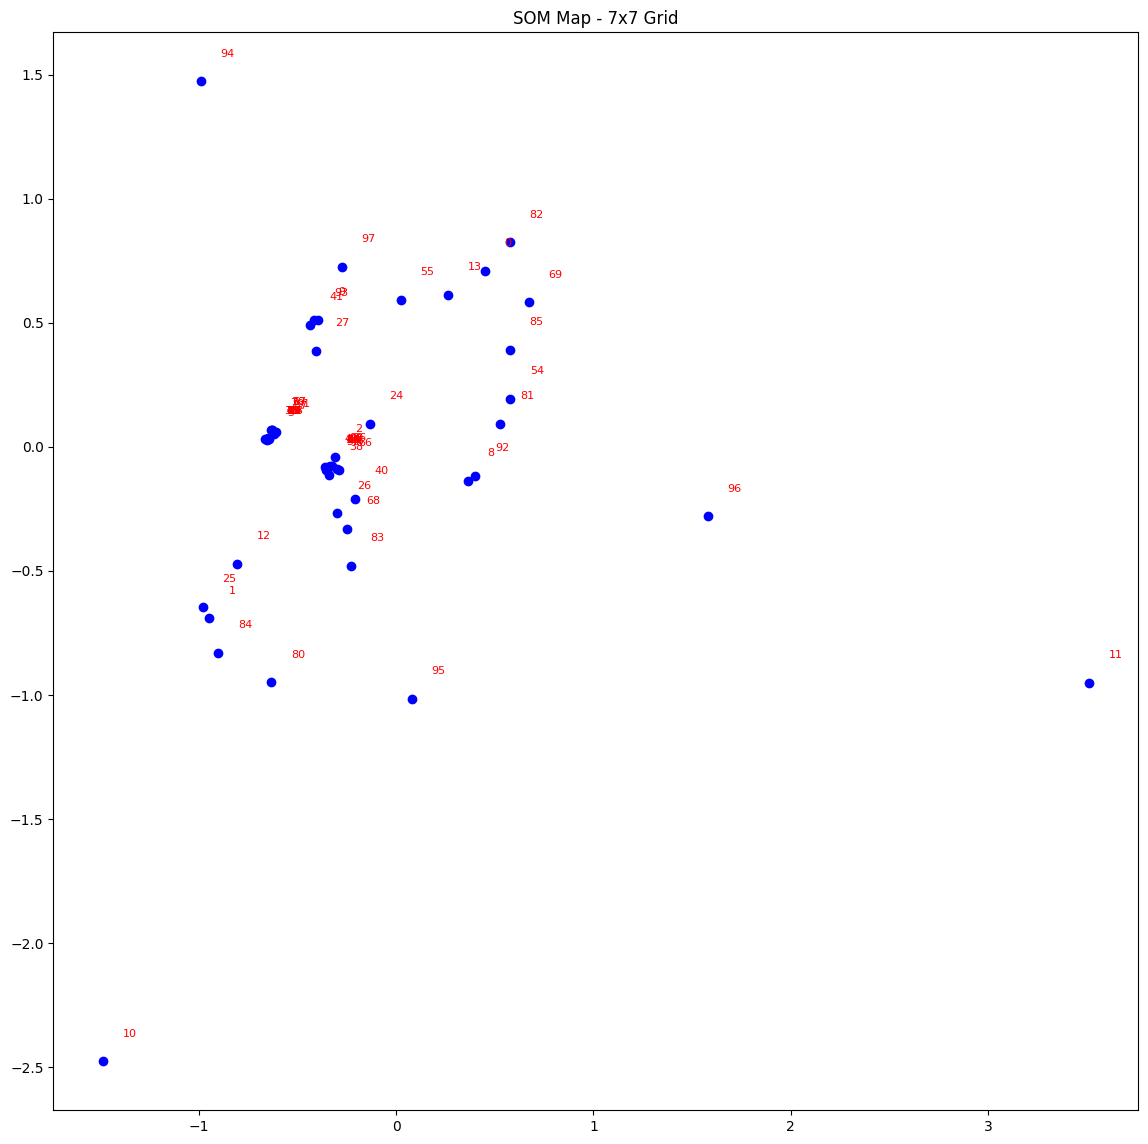

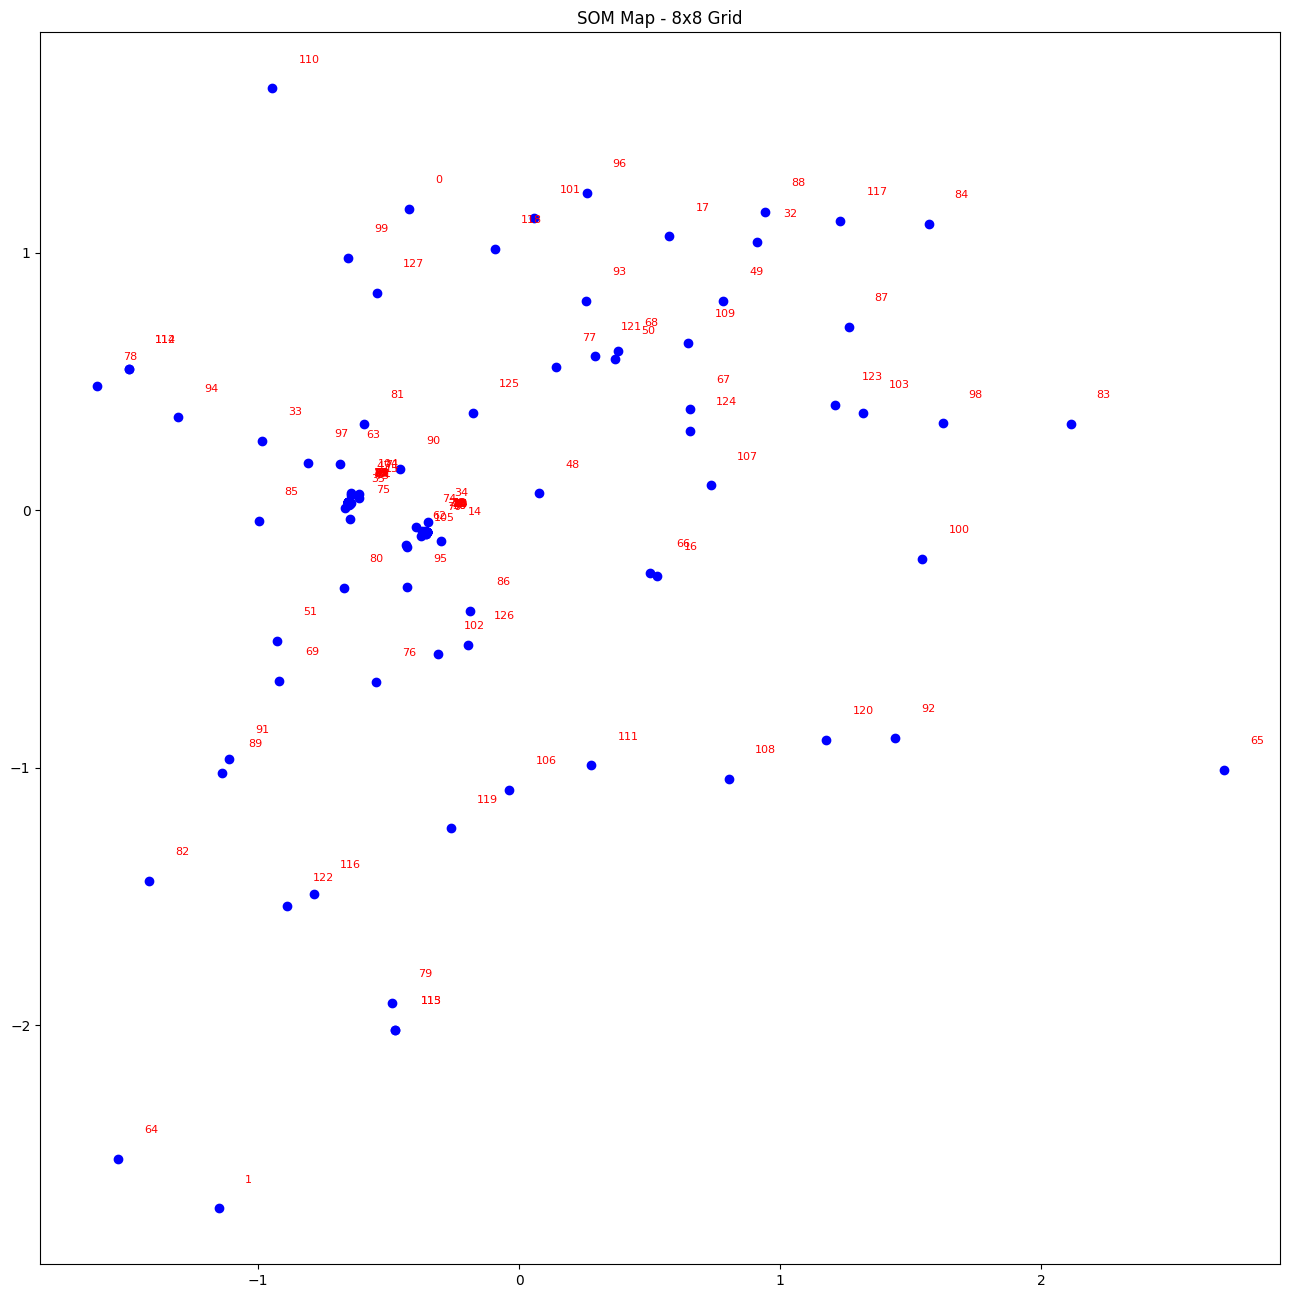

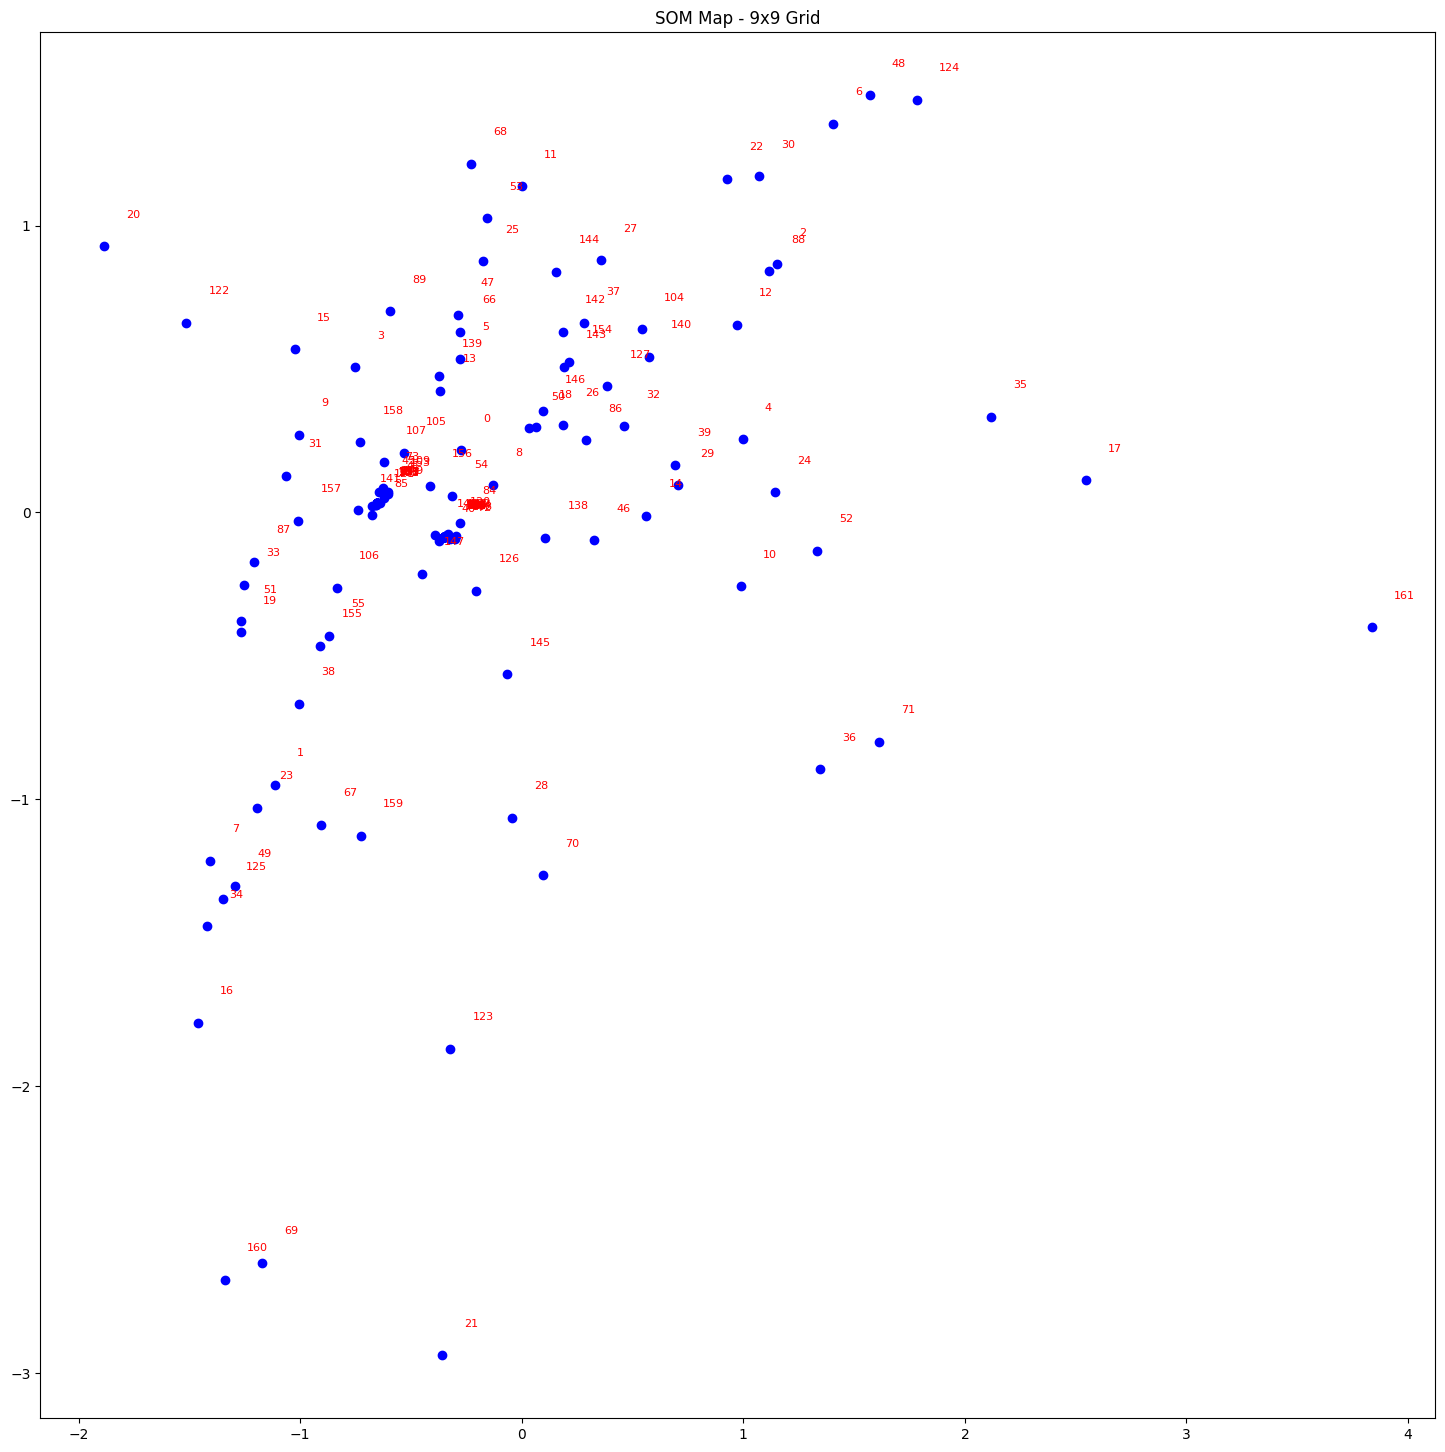

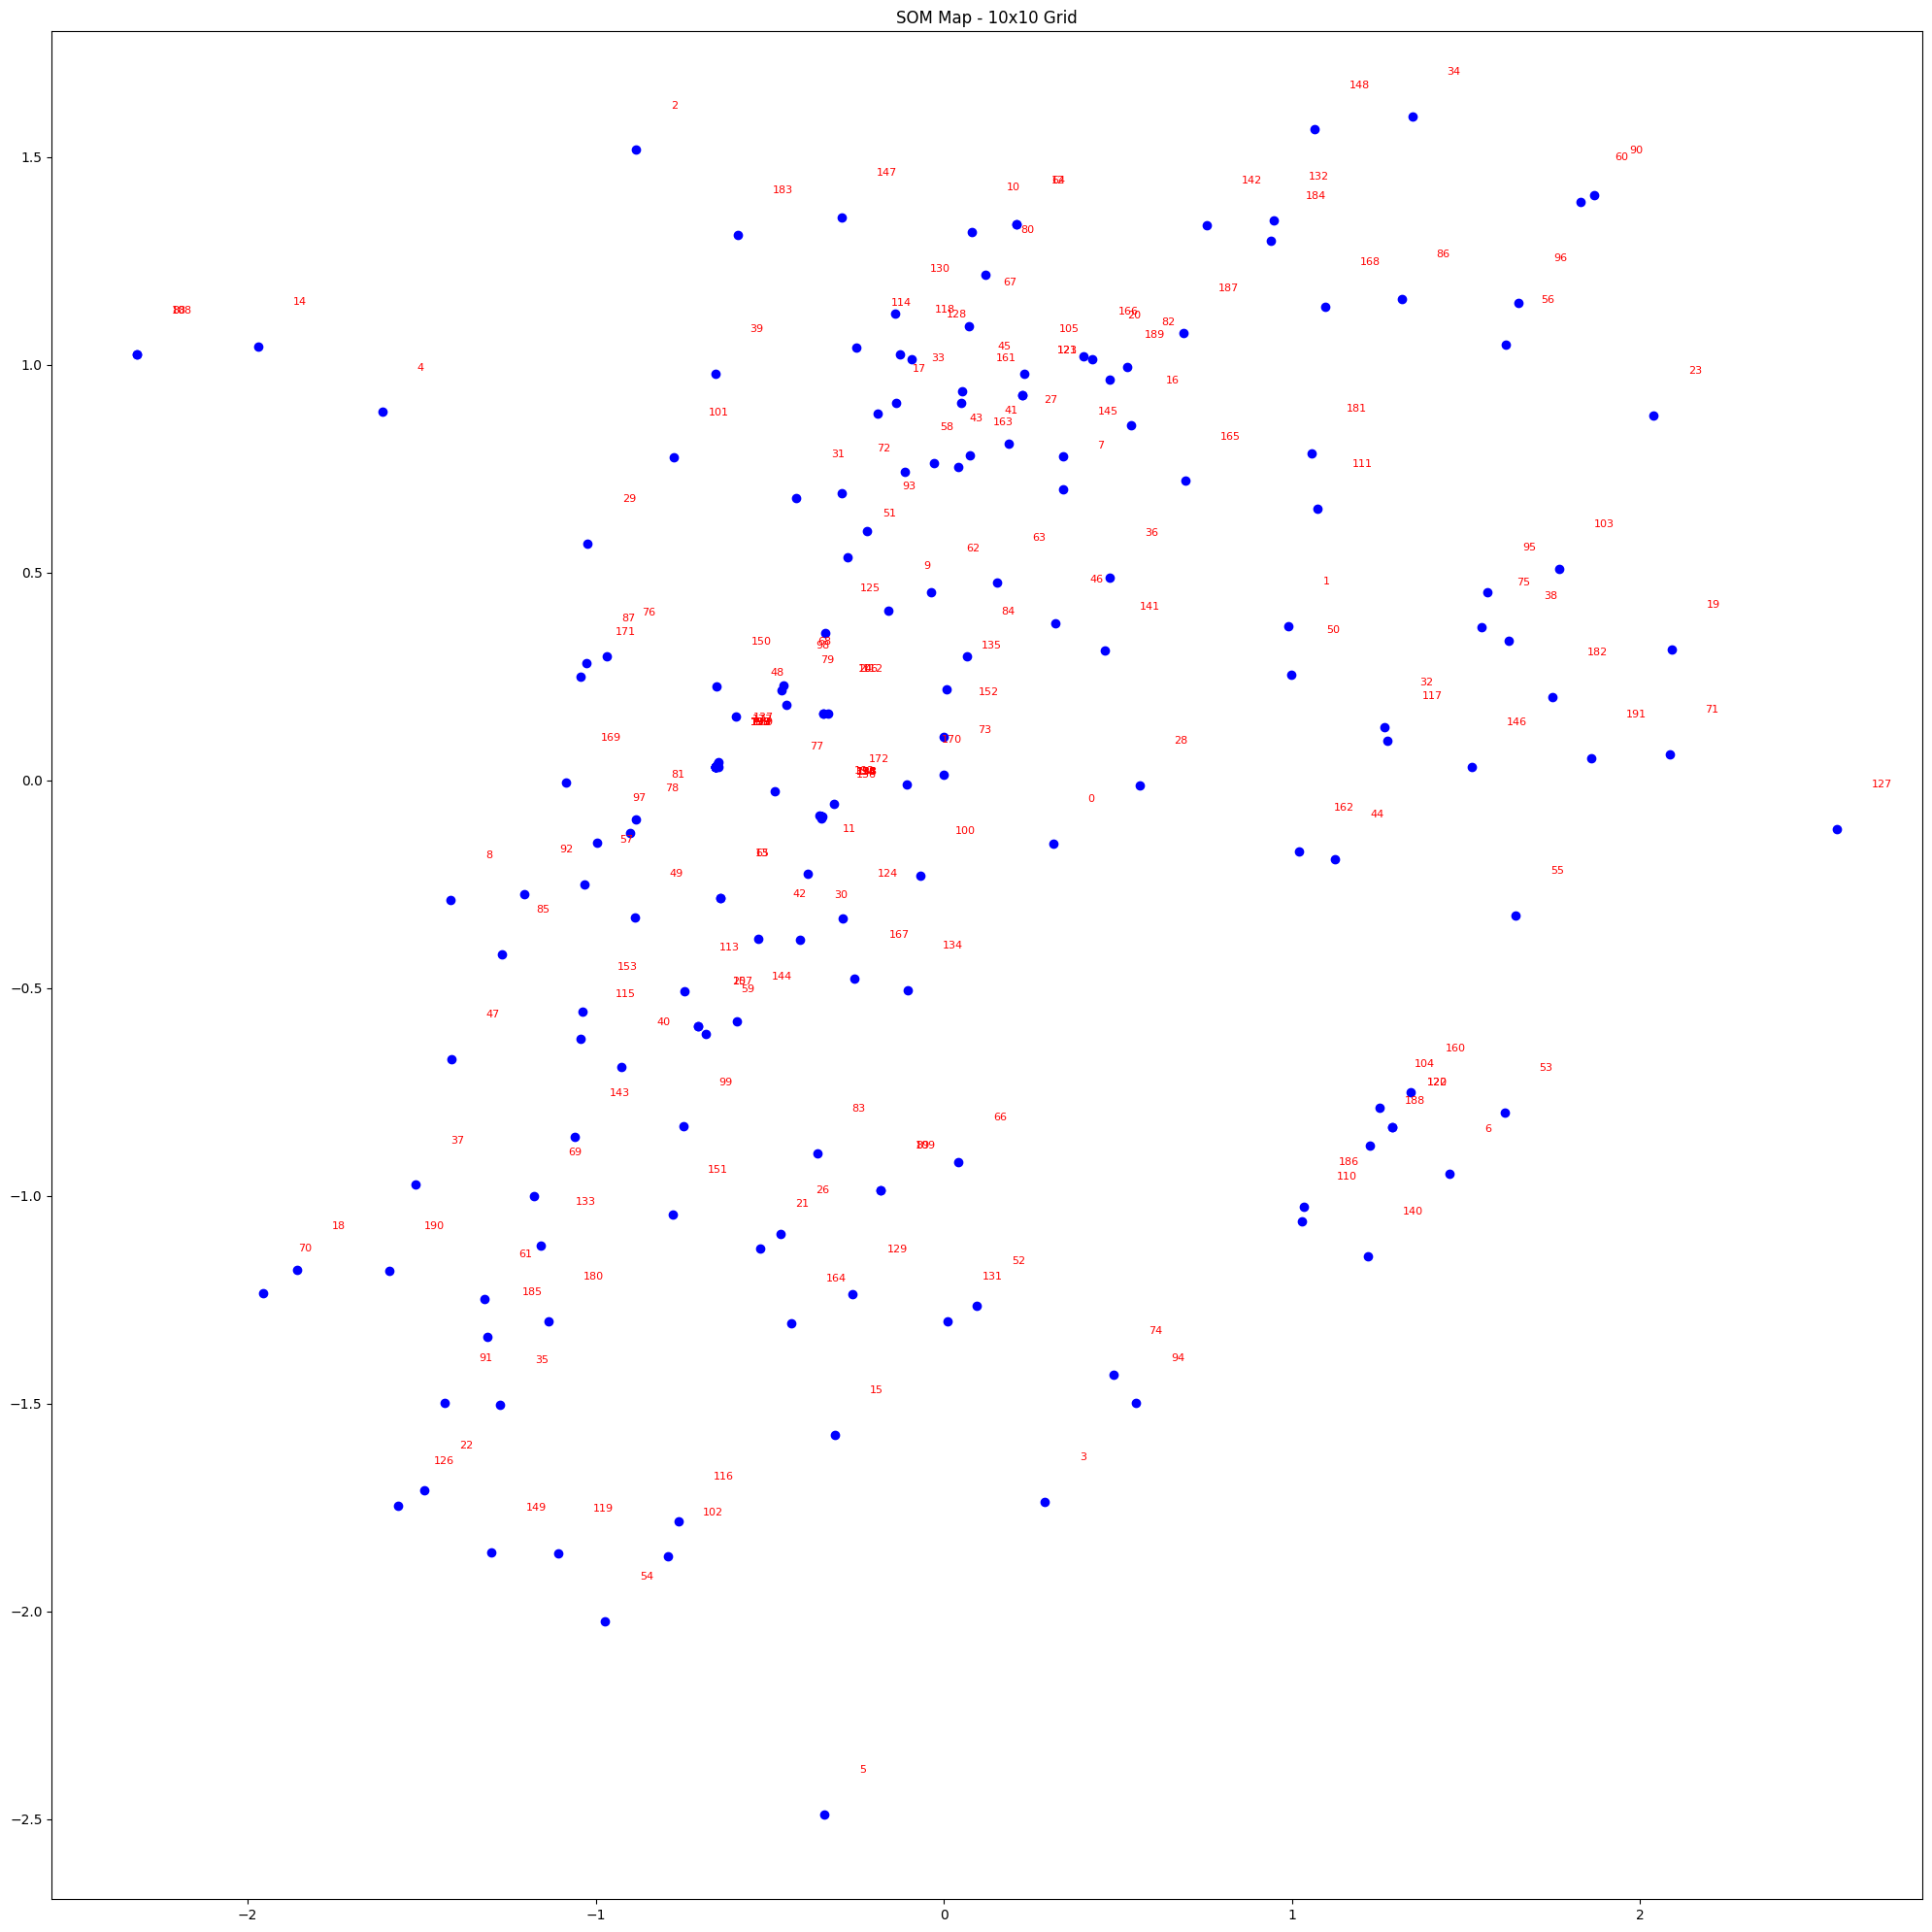

In [23]:
import matplotlib.pyplot as plt

# Define a range of grid sizes to visualize
grid_sizes = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]

# Loop through different grid sizes and visualize the SOM maps
for grid_size in grid_sizes:
    som = MiniSom(grid_size[0], grid_size[1], input_dimensions, sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X_train)
    num_epochs = 1000
    for epoch in range(num_epochs):
        som.train_random(X_train, 1)

    plt.figure(figsize=(grid_size[0]*2, grid_size[1]*2))
    plt.title(f'SOM Map - {grid_size[0]}x{grid_size[1]} Grid')
    for i, (x, y) in enumerate(som.get_weights().reshape(-1, 2)):
        plt.scatter(x, y, color='blue')
        plt.text(x + 0.1, y + 0.1, str(i), fontsize=8, color='red')

plt.tight_layout()
plt.show()


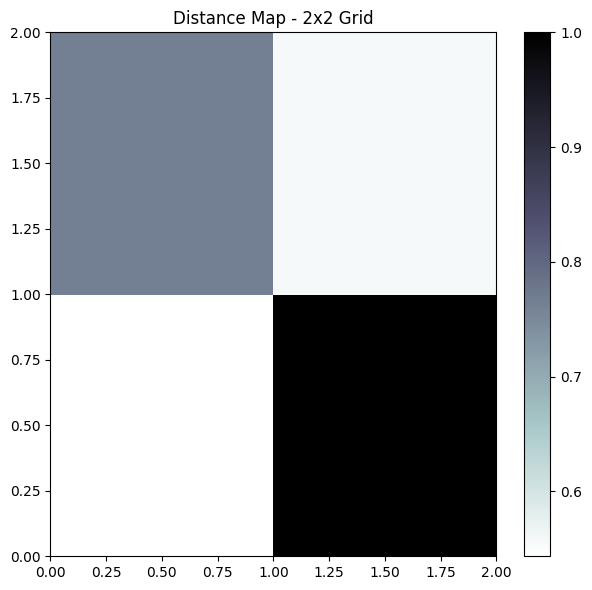

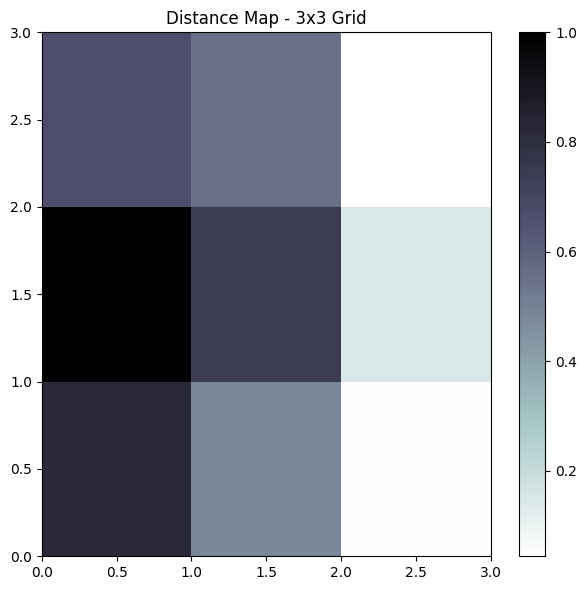

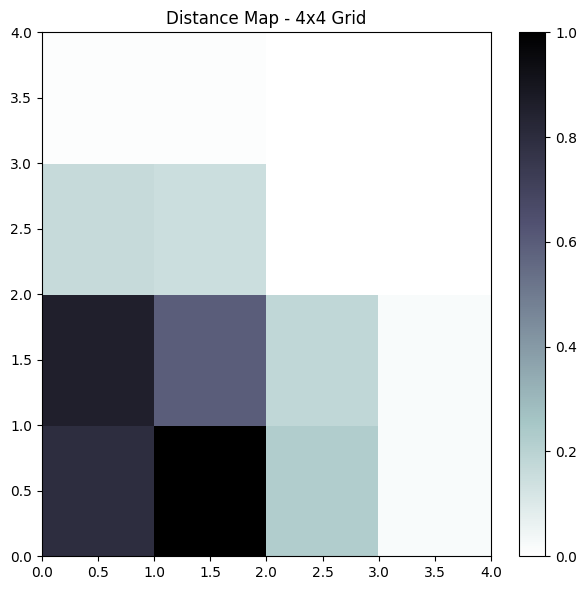

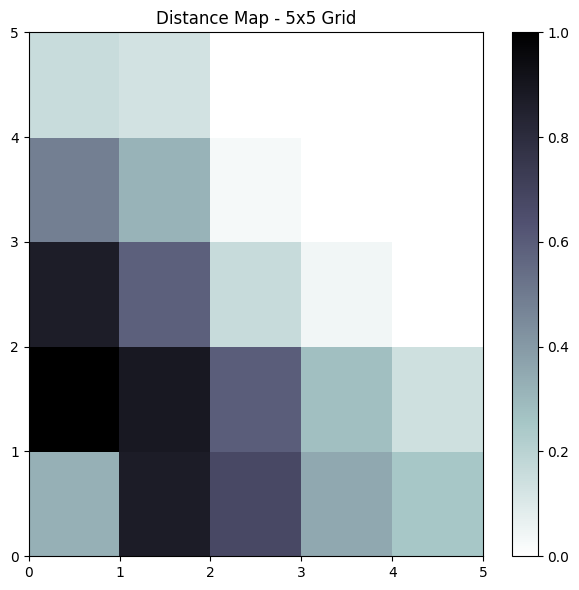

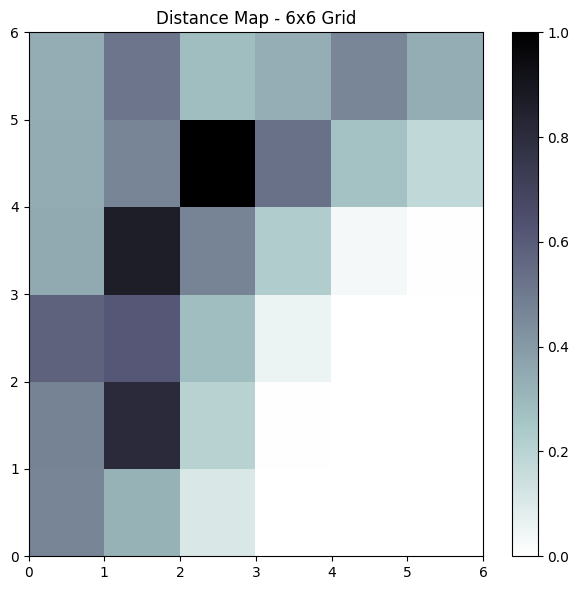

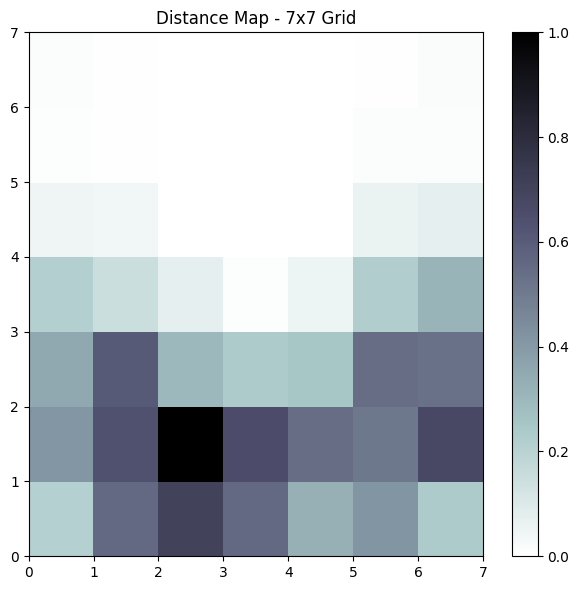

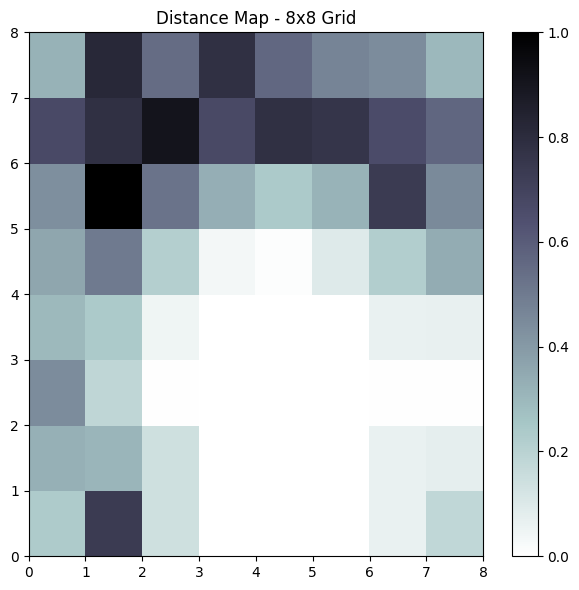

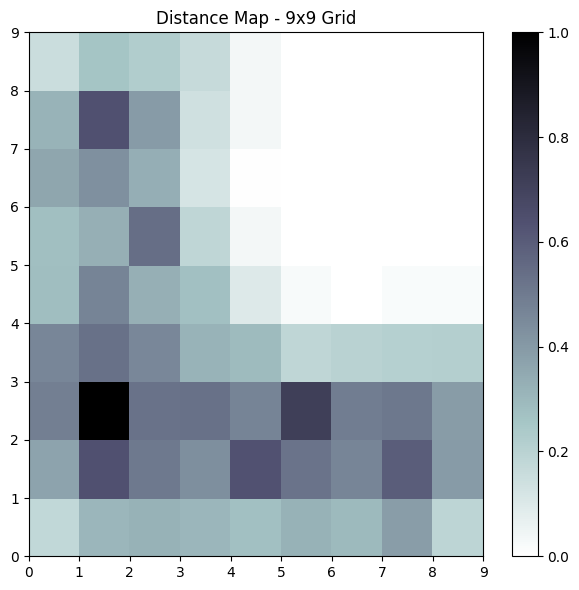

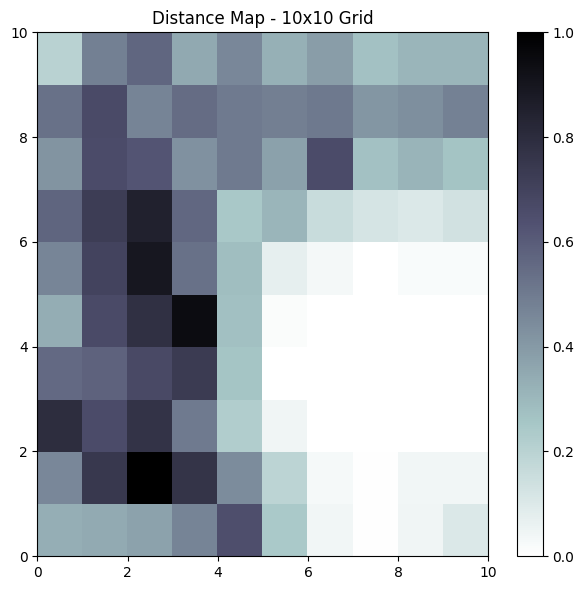

In [27]:
import matplotlib.pyplot as plt
from minisom import MiniSom

# Define a range of grid sizes to visualize
grid_sizes = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]

# Loop through different grid sizes and visualize the SOM maps
for grid_size in grid_sizes:
    som = MiniSom(grid_size[0], grid_size[1], X_train.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X_train)
    num_epochs = 1000
    for epoch in range(num_epochs):
        som.train_random(X_train, 1)

    plt.figure(figsize=(12, 6))

    # Plot the SOM grid map
    # plt.subplot(1, 2, 1)
    # plt.title(f'SOM Grid Map - {grid_size[0]}x{grid_size[1]} Grid')
    # for i, (x, y) in enumerate(som.get_weights().reshape(-1, 2)):
    #     plt.scatter(x, y, color='blue')
    #     plt.text(x + 0.1, y + 0.1, str(i), fontsize=8, color='red')

    # Plot the distance map
    plt.subplot(1, 2, 2)
    plt.title(f'Distance Map - {grid_size[0]}x{grid_size[1]} Grid')
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()

    plt.tight_layout()
    plt.show()
